<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
# !pip install pandas
# !pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [5]:
df_unique = df.drop_duplicates().copy()

dups_before = df.duplicated().sum()
dups_after = df_unique.duplicated().sum()

print('Before dropping dups:', dups_before)
print('After dropping dups:', dups_after)

Before dropping dups: 20
After dropping dups: 0


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [6]:
print('Nulls before imputation:', df_unique['CodingActivities'].isnull().sum())

Nulls before imputation: 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [7]:
mode_CodingActivities = df_unique['CodingActivities'].mode()[0]
df_unique.fillna({'CodingActivities': mode_CodingActivities}, inplace=True)

print('Nulls after imputation:', df_unique['CodingActivities'].isnull().sum())

Nulls after imputation: 0


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [8]:
comp_col = [col for col in df_unique.columns if 'Comp' in col]
df_unique[comp_col].describe(include='all')

,CompTotal,AIComplex,ConvertedCompYearly
count,3.374000e+04,37021,2.343500e+04
unique,NaN,5,NaN
top,NaN,"Good, but not great at handling complex tasks",NaN
freq,NaN,12102,NaN
mean,2.963841e+145,NaN,8.615529e+04
std,5.444117e+147,NaN,1.867570e+05
min,0.000000e+00,NaN,1.000000e+00
25%,6.000000e+04,NaN,3.271200e+04
50%,1.100000e+05,NaN,6.500000e+04
75%,2.500000e+05,NaN,1.079715e+05


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [9]:
x = df['ConvertedCompYearly']
df_unique['ConvertedCompYearly_MinMax'] = (x - x.min()) / (x.max() - x.min())
df_unique[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].describe()

,ConvertedCompYearly,ConvertedCompYearly_MinMax
count,2.343500e+04,23435.000000
mean,8.615529e+04,0.005300
std,1.867570e+05,0.011488
min,1.000000e+00,0.000000
25%,3.271200e+04,0.002012
50%,6.500000e+04,0.003998
75%,1.079715e+05,0.006642
max,1.625660e+07,1.000000


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [10]:
df_unique['ConvertedCompYearly_Zscore'] = (x - x.mean()) / (x.std())
df_unique[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax', 'ConvertedCompYearly_Zscore']].describe()

,ConvertedCompYearly,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore
count,2.343500e+04,23435.000000,23435.000000
mean,8.615529e+04,0.005300,-0.000019
std,1.867570e+05,0.011488,1.000020
min,1.000000e+00,0.000000,-0.461347
25%,3.271200e+04,0.002012,-0.286190
50%,6.500000e+04,0.003998,-0.113299
75%,1.079715e+05,0.006642,0.116799
max,1.625660e+07,1.000000,86.587262


In [11]:
# Z-score assumes a normal distribution, but the data appears to be not normal. Use log-transform before Z-score to tame the skew.

In [12]:
import numpy as np

df_unique['ConvertedCompYearly_Log'] = np.log1p(df_unique['ConvertedCompYearly'])
log_x = df_unique['ConvertedCompYearly_Log']
df_unique['ConvertedCompYearly_Log_Zscore'] = (log_x - log_x.mean()) / log_x.std()
df_unique[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax', 'ConvertedCompYearly_Zscore', 'ConvertedCompYearly_Log_Zscore']].describe()

,ConvertedCompYearly,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore,ConvertedCompYearly_Log_Zscore
count,2.343500e+04,23435.000000,23435.000000,2.343500e+04
mean,8.615529e+04,0.005300,-0.000019,1.884371e-16
std,1.867570e+05,0.011488,1.000020,1.000000e+00
min,1.000000e+00,0.000000,-0.461347,-7.194343e+00
25%,3.271200e+04,0.002012,-0.286190,-2.782544e-01
50%,6.500000e+04,0.003998,-0.113299,2.111919e-01
75%,1.079715e+05,0.006642,0.116799,5.729314e-01
max,1.625660e+07,1.000000,86.587262,4.147300e+00


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


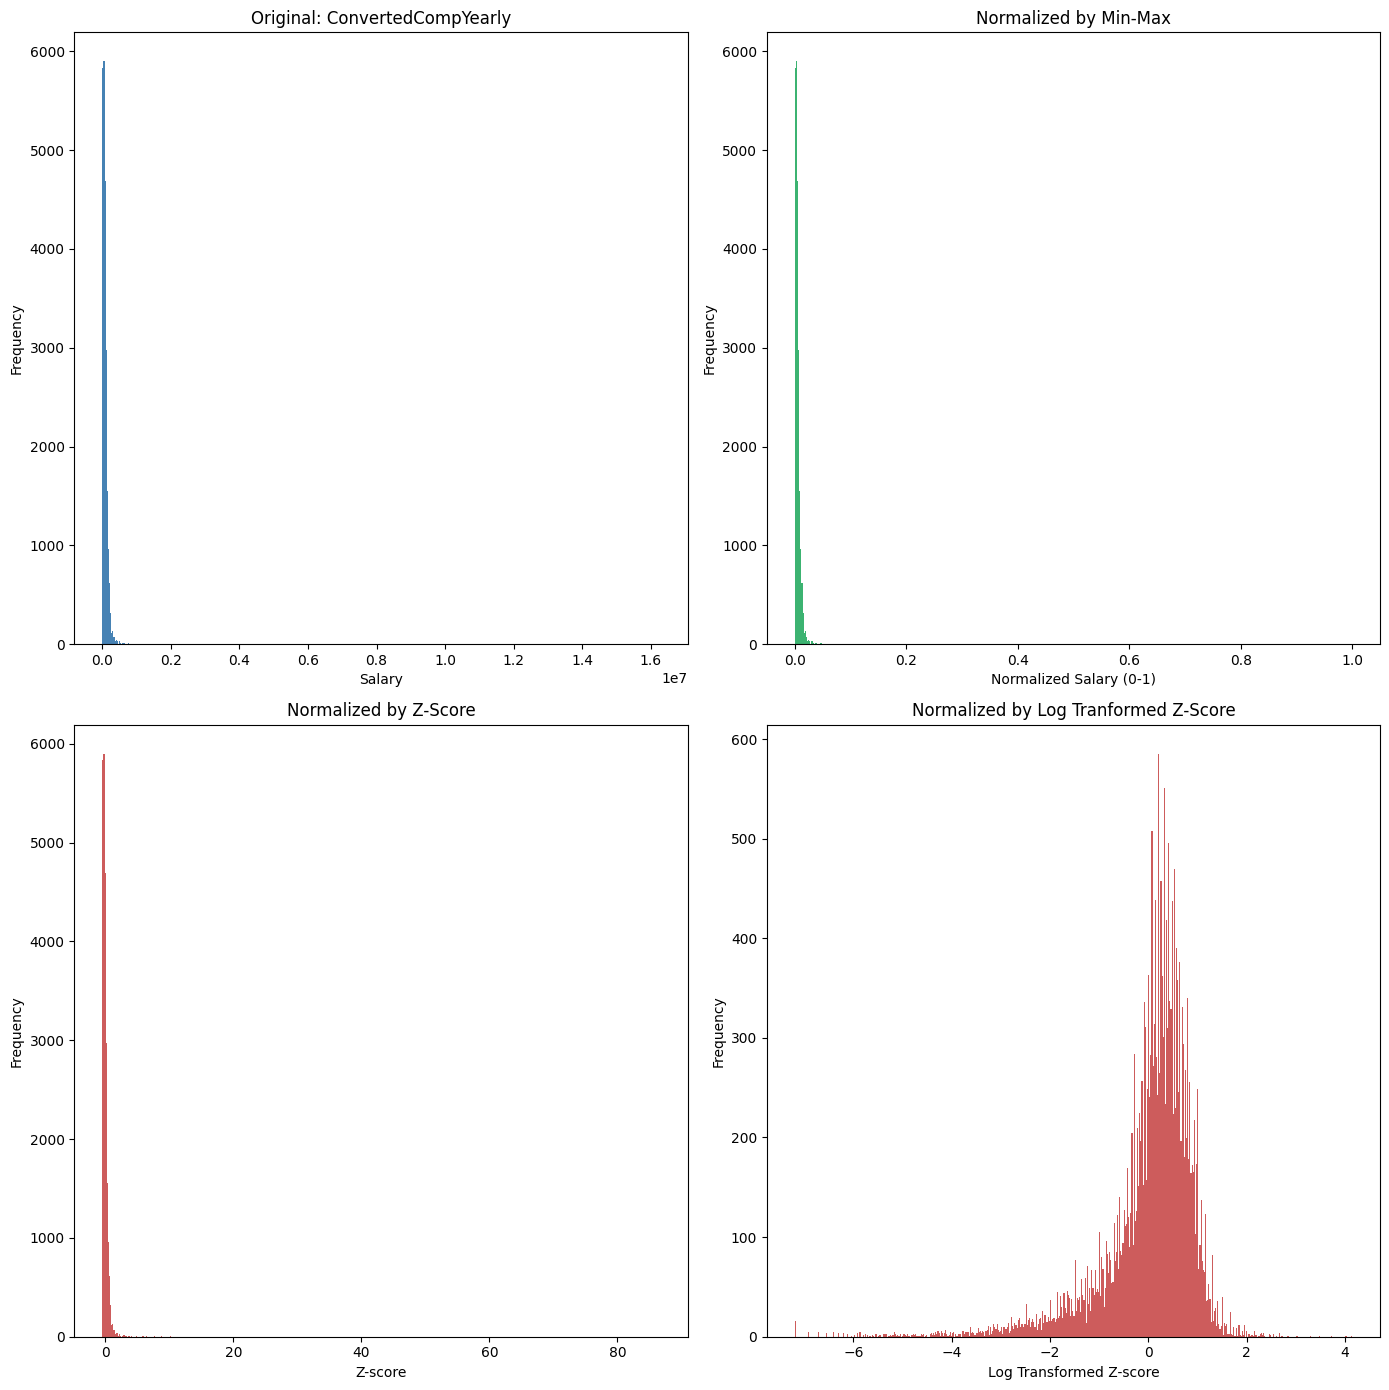

In [13]:
# Set figure size
plt.figure(figsize=(14, 14))

# Original
plt.subplot(2, 2, 1)
plt.hist(df_unique['ConvertedCompYearly'].dropna(), bins=500, color='steelblue')
plt.title('Original: ConvertedCompYearly')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Min-Max Normalized
plt.subplot(2, 2, 2)
plt.hist(df_unique['ConvertedCompYearly_MinMax'].dropna(), bins=500, color='mediumseagreen')
plt.title('Normalized by Min-Max')
plt.xlabel('Normalized Salary (0-1)')
plt.ylabel('Frequency')

# Z-Score Normalized
plt.subplot(2, 2, 3)
plt.hist(df_unique['ConvertedCompYearly_Zscore'].dropna(), bins=500, color='indianred')
plt.title('Normalized by Z-Score')
plt.xlabel('Z-score')
plt.ylabel('Frequency')

# Log Z-Score Normalized
plt.subplot(2, 2, 4)
plt.hist(df_unique['ConvertedCompYearly_Log_Zscore'].dropna(), bins=500, color='indianred')
plt.title('Normalized by Log Tranformed Z-Score')
plt.xlabel('Log Transformed Z-score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
